In [1]:

#importing libraries
import spacy
from spacy import displacy
import pandas as pd
import string
import matplotlib.pyplot as plt


In [2]:
nlp=spacy.load('en_core_web_sm')

In [3]:
data_train = pd.read_csv('amazon_cells_labelled.txt', sep='\t', header=None, low_memory=False)


In [4]:
data_train.head()

0  1
0  So there is no way for me to plug it in here i...  0
1                        Good case, Excellent value.  1
2                             Great for the jawbone.  1
3  Tied to charger for conversations lasting more...  0
4                                  The mic is great.  1

In [5]:
data_train.shape

(1000, 2)

In [6]:
# rows_to_drop = 150000
# if len(data_train) > rows_to_drop:
#     data_train = data_train.iloc[rows_to_drop:]

In [7]:
data_train.shape

(1000, 2)

In [8]:
print(data_train.columns)

Index([0, 1], dtype='int64')


In [9]:
# columns_name = ['PhraseId','SentenceId','Review', 'Sentiment']
columns_name = ['Review', 'Sentiment']
data_train.columns = columns_name

In [10]:
data_train.head()

Review  Sentiment
0  So there is no way for me to plug it in here i...          0
1                        Good case, Excellent value.          1
2                             Great for the jawbone.          1
3  Tied to charger for conversations lasting more...          0
4                                  The mic is great.          1

In [11]:
data_train = pd.DataFrame(data_train)

In [12]:
print (data_train.columns)

Index(['Review', 'Sentiment'], dtype='object')


In [13]:
# index=0
# data_train = data_train.drop(index)
# data_train = data_train.drop(columns=data_train.columns[:2])

In [14]:
data_train.head()

Review  Sentiment
0  So there is no way for me to plug it in here i...          0
1                        Good case, Excellent value.          1
2                             Great for the jawbone.          1
3  Tied to charger for conversations lasting more...          0
4                                  The mic is great.          1

In [15]:
#data exploaration
data_train['Sentiment'].value_counts()
# print(data.columns)

Sentiment
0    500
1    500
Name: count, dtype: int64

In [16]:
data_train.isnull().sum()

Review       0
Sentiment    0
dtype: int64

In [17]:
# Show dataset statistics
data_train.describe()

Sentiment
count  1000.00000
mean      0.50000
std       0.50025
min       0.00000
25%       0.00000
50%       0.50000
75%       1.00000
max       1.00000

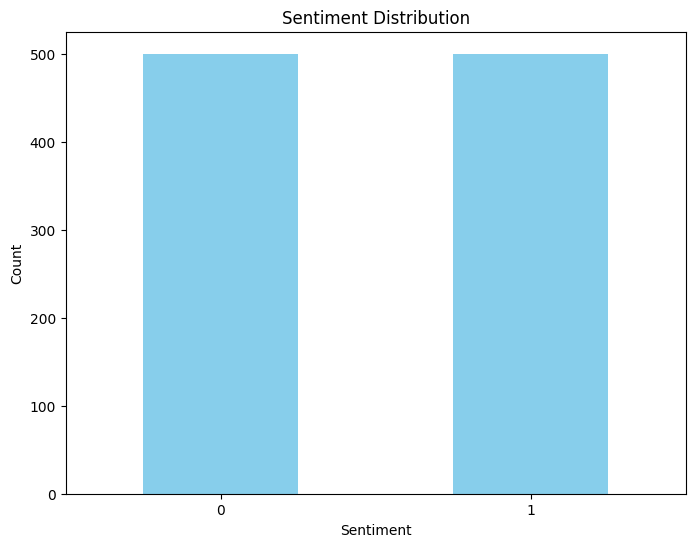

In [18]:
# Count the occurrences of each sentiment value
sentiment_counts = data_train['Sentiment'].value_counts()

# Plotting the sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.sort_index().plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [19]:
data_train.drop_duplicates(inplace=True)

In [20]:
### DATA PREPROCESSING

In [21]:
#converting into lower case
data_train['Review'] = data_train['Review'].str.lower()
# data_train.head(1)

In [22]:
def spacy_preprocessing(text):




    # Tokenize and remove punctuation and stop words
    tokens = [token.text for token in nlp(text) if token.text not in string.punctuation and not nlp.vocab[token.text].is_stop]

    # Remove special characters
    tokens = [token for token in tokens if token.isalnum()]

    return tokens

def preprocess_dataframe(df):
    preprocessed_reviews = []

    for index, row in df.iterrows():
        review_text = row['Review']
        processed_tokens = spacy_preprocessing(review_text)
        preprocessed_reviews.append(processed_tokens)

    df['preprocessed_review'] = preprocessed_reviews
    return df

# Example usage:


preprocessed_data = preprocess_dataframe(data_train)

print(preprocessed_data)

                                                Review  Sentiment  \
0    so there is no way for me to plug it in here i...          0   
1                          good case, excellent value.          1   
2                               great for the jawbone.          1   
3    tied to charger for conversations lasting more...          0   
4                                    the mic is great.          1   
..                                                 ...        ...   
995  the screen does get smudged easily because it ...          0   
996  what a piece of junk.. i lose more calls on th...          0   
997                       item does not match picture.          0   
998  the only thing that disappoint me is the infra...          0   
999  you can not answer calls with the unit, never ...          0   

                                   preprocessed_review  
0                               [way, plug, converter]  
1                       [good, case, excellent, value]  


In [23]:
def spacy_preprocessing(tokens_list):


    # Join the tokens into a single string
    text = ' '.join(tokens_list)

    # Perform sentence segmentation
    sentences = [sent.text for sent in nlp(text).sents]

    # Tokenize each sentence
    tokenized_sentences = []
    for sentence in sentences:
        tokens = [token.text for token in nlp(sentence)]
        tokenized_sentences.append(tokens)

    return tokenized_sentences

def tokenize_and_segment_dataframe(df):
    # Assuming 'preprocessed_review' is the column you want to process
    df['tokenized_and_segmented'] = df['preprocessed_review'].apply(spacy_preprocessing)
    return df

# Example usage:

preprocessed_data = pd.DataFrame(preprocessed_data)

preprocessed_data = tokenize_and_segment_dataframe(preprocessed_data)

print(preprocessed_data)

                                                Review  Sentiment  \
0    so there is no way for me to plug it in here i...          0   
1                          good case, excellent value.          1   
2                               great for the jawbone.          1   
3    tied to charger for conversations lasting more...          0   
4                                    the mic is great.          1   
..                                                 ...        ...   
995  the screen does get smudged easily because it ...          0   
996  what a piece of junk.. i lose more calls on th...          0   
997                       item does not match picture.          0   
998  the only thing that disappoint me is the infra...          0   
999  you can not answer calls with the unit, never ...          0   

                                   preprocessed_review  \
0                               [way, plug, converter]   
1                       [good, case, excellent, value] 

In [24]:


def lemmatisation(tokens_list):
    # Flatten the list of lists into a single list
    tokens_flat = [token for sublist in tokens_list for token in sublist]

    # Join the tokens into a single string
    text = ' '.join(tokens_flat)

    # Perform sentence segmentation
    sentences = [sent.text for sent in nlp(text).sents]

    # Tokenize, lemmatize, and remove stop words for each sentence
    preprocessed_tokens = []
    for sentence in sentences:
        doc = nlp(sentence)
        tokens = [token.lemma_ for token in doc if not token.is_stop]
        preprocessed_tokens.extend(tokens)

    return preprocessed_tokens

def lemmatize_dataframe(df):
    # Assuming 'tokenized_and_segmented' is the column you want to process
    df['lemmatized'] = df['tokenized_and_segmented'].apply(lemmatisation)
    return df

# Example usage:


lemmatised_data = lemmatize_dataframe(preprocessed_data)

print(lemmatised_data)


                                                Review  Sentiment  \
0    so there is no way for me to plug it in here i...          0   
1                          good case, excellent value.          1   
2                               great for the jawbone.          1   
3    tied to charger for conversations lasting more...          0   
4                                    the mic is great.          1   
..                                                 ...        ...   
995  the screen does get smudged easily because it ...          0   
996  what a piece of junk.. i lose more calls on th...          0   
997                       item does not match picture.          0   
998  the only thing that disappoint me is the infra...          0   
999  you can not answer calls with the unit, never ...          0   

                                   preprocessed_review  \
0                               [way, plug, converter]   
1                       [good, case, excellent, value] 

In [25]:


def pos_tagging(tokens_list):
    # Flatten the list of lists into a single list
    tokens_flat = [token for sublist in tokens_list for token in sublist]

    # Join the tokens into a single string
    text = ' '.join(tokens_flat)

    # Perform POS tagging
    doc = nlp(text)
    pos_tags = [(token.text, token.pos_) for token in doc]

    return pos_tags

def pos_tagging_dataframe(df):
    # Assuming 'tokenized_and_segmented' is the column you want to process
    df['pos_tags'] = df['tokenized_and_segmented'].apply(pos_tagging)
    return df



pos_tagging = pos_tagging_dataframe(lemmatised_data)

print(pos_tagging)


                                                Review  Sentiment  \
0    so there is no way for me to plug it in here i...          0   
1                          good case, excellent value.          1   
2                               great for the jawbone.          1   
3    tied to charger for conversations lasting more...          0   
4                                    the mic is great.          1   
..                                                 ...        ...   
995  the screen does get smudged easily because it ...          0   
996  what a piece of junk.. i lose more calls on th...          0   
997                       item does not match picture.          0   
998  the only thing that disappoint me is the infra...          0   
999  you can not answer calls with the unit, never ...          0   

                                   preprocessed_review  \
0                               [way, plug, converter]   
1                       [good, case, excellent, value] 

In [26]:


def extract_syntactic_relations(pos_tags):
    # Convert pos_tags into a Doc object for spaCy
    doc = nlp(' '.join([token[0] for token in pos_tags]))

    # Extract syntactic relations
    syntactic_relations = [(token.text, token.dep_, token.head.text) for token in doc]

    return syntactic_relations

def extract_named_entities(pos_tags):
    # Convert pos_tags into a Doc object for spaCy
    doc = nlp(' '.join([token[0] for token in pos_tags]))

    # Extract named entities
    named_entities = [(ent.text, ent.label_) for ent in doc.ents]

    return named_entities

def extract_syntactic_and_entities(df):
    # Assuming 'pos_tags' is the column you want to process
    df['syntactic_relations'] = df['pos_tags'].apply(extract_syntactic_relations)
    df['named_entities'] = df['pos_tags'].apply(extract_named_entities)
    return df

# Example usage:


named_entities = extract_syntactic_and_entities(pos_tagging)

print(named_entities)


                                                Review  Sentiment  \
0    so there is no way for me to plug it in here i...          0   
1                          good case, excellent value.          1   
2                               great for the jawbone.          1   
3    tied to charger for conversations lasting more...          0   
4                                    the mic is great.          1   
..                                                 ...        ...   
995  the screen does get smudged easily because it ...          0   
996  what a piece of junk.. i lose more calls on th...          0   
997                       item does not match picture.          0   
998  the only thing that disappoint me is the infra...          0   
999  you can not answer calls with the unit, never ...          0   

                                   preprocessed_review  \
0                               [way, plug, converter]   
1                       [good, case, excellent, value] 

In [27]:
#check which columns should be processed

def numeric_symbolic_punctuation(tokens_list):
    # Flatten the list of lists into a single list
    tokens_flat = [token for sublist in tokens_list for token in sublist]

    # Join the tokens into a single string
    text = ' '.join(tokens_flat)

    # Process the text with spaCy
    doc = nlp(text)

    # Identify numeric, symbolic, and punctuation tags
    identified_tags = [(token.text, token.pos_) for token in doc if token.pos_ in ['NUM', 'SYM', 'PUNCT']]

    return identified_tags

def identify_and_classify(df):
    # Assuming 'tokenized_and_segmented' is the column you want to process
    df['identified_tags'] = df['syntactic_relations'].apply(numeric_symbolic_punctuation)
    return df



relation_data = identify_and_classify(named_entities)

print(relation_data)


                                                Review  Sentiment  \
0    so there is no way for me to plug it in here i...          0   
1                          good case, excellent value.          1   
2                               great for the jawbone.          1   
3    tied to charger for conversations lasting more...          0   
4                                    the mic is great.          1   
..                                                 ...        ...   
995  the screen does get smudged easily because it ...          0   
996  what a piece of junk.. i lose more calls on th...          0   
997                       item does not match picture.          0   
998  the only thing that disappoint me is the infra...          0   
999  you can not answer calls with the unit, never ...          0   

                                   preprocessed_review  \
0                               [way, plug, converter]   
1                       [good, case, excellent, value] 

In [28]:


def generate_word_vectors(pos_tags):
    # Convert pos_tags into a Doc object for spaCy
    doc = nlp(' '.join([token[0] for token in pos_tags]))

    # Generate word vectors
    word_vectors = [token.vector for token in doc]

    return word_vectors

def generate_and_understand_word_vectors_dataframe(df):
    # Assuming 'pos_tagging' is the column you want to process
    df['word_vectors'] = df['pos_tags'].apply(generate_word_vectors)
    return df



word_vectorised = generate_and_understand_word_vectors_dataframe(relation_data)

# The 'word_vectors' column will contain word vectors for each sentence
print(word_vectorised)


                                                Review  Sentiment  \
0    so there is no way for me to plug it in here i...          0   
1                          good case, excellent value.          1   
2                               great for the jawbone.          1   
3    tied to charger for conversations lasting more...          0   
4                                    the mic is great.          1   
..                                                 ...        ...   
995  the screen does get smudged easily because it ...          0   
996  what a piece of junk.. i lose more calls on th...          0   
997                       item does not match picture.          0   
998  the only thing that disappoint me is the infra...          0   
999  you can not answer calls with the unit, never ...          0   

                                   preprocessed_review  \
0                               [way, plug, converter]   
1                       [good, case, excellent, value] 

In [29]:
# Check the shape of the word_vectors column
print(word_vectorised['word_vectors'].shape)

# Investigate the content of the word_vectors column
print(word_vectorised['word_vectors'][0])

(990,)
[array([ 0.53620636, -1.3574767 ,  0.04094932, -0.87377775, -0.6102114 ,
       -0.6535159 ,  0.24546349,  2.053395  , -0.20674546, -0.19330822,
        1.3860214 , -1.4033927 , -0.9898274 , -0.31619024,  0.8045485 ,
       -0.50675637,  0.8671998 , -1.4390789 , -0.2688665 , -1.6938928 ,
        1.899449  ,  0.2723691 ,  0.00295331, -0.14530528,  0.41954964,
       -0.15320274,  0.76008034,  0.18037651,  0.5362558 , -0.54146975,
       -0.88755393, -0.5312475 , -0.09222758, -0.779295  , -0.40175378,
       -0.13816953, -0.8054316 ,  0.13801967, -0.03760722, -0.2730021 ,
       -1.6030777 ,  0.4183445 ,  0.74147344,  1.2507389 ,  0.078776  ,
        1.3261002 ,  0.0766688 ,  0.0571209 , -0.13273448,  0.3280968 ,
        0.6293248 , -1.1353979 ,  0.98327523,  0.5501456 , -0.23882328,
        1.6055474 ,  1.553422  , -0.38691038,  0.85701585, -0.4237597 ,
       -0.73775244,  0.09013593, -0.0609054 ,  0.4146982 ,  1.0895021 ,
        0.24162832, -1.1721039 , -0.46766943,  0.2538464

In [30]:
# Assuming 'word_vectorised' is your DataFrame and 'pos_tags' is the column
sample_review_index = 0  # Choose the index of the review you want to use as a sample

# Sample review from the 'pos_tags' column
pos_tags_list = word_vectorised['pos_tags'][sample_review_index]

# Convert each tuple in the list to a string
pos_tags_strings = [' '.join(tag) for tag in pos_tags_list]

# Convert the list of POS tag strings to a single string
sample_review = ' '.join(pos_tags_strings)

# Method 1: SpaCy Word Embeddings
spacy_embedding = nlp(sample_review).vector

# Method 2: GloVe (using spaCy)
glove_embedding = nlp(sample_review).vector


In [31]:
print("SpaCy Embedding:")
print(spacy_embedding)

print("\nGloVe Embedding:")
print(glove_embedding)

SpaCy Embedding:
[-0.08332413 -0.7826341  -0.45332214  0.31467333 -0.5452969   0.05463786
  0.4534513   0.4050698   0.32406542 -0.10698821 -0.02393111  0.5083988
 -0.3106676  -0.27245829 -0.5134877   0.09120104 -0.8333683  -0.4107606
 -0.47438982  0.05883173  0.41151023  0.39224294  0.03737084 -0.44050726
  0.57753175  0.35743916  0.2894081   0.27533165  0.28552273  0.44636616
 -0.33930066 -0.5105976  -0.25102     0.29363975 -0.33311483 -0.29457626
  0.12430146 -0.05936823 -0.17838486 -0.6077671  -0.17601882  0.6861022
 -0.3832114   0.86712927 -0.41779092 -0.53093165 -0.25142196  0.5681177
 -0.3158547   0.2628928   0.01288549 -0.16067153  0.76224726 -0.7823178
 -0.32177603 -0.54934645  0.6802616   0.36670852  0.28882542 -0.24399312
 -0.5748972   0.27590284 -0.31544614 -1.056663    0.40067983 -0.11822734
  0.06986658  0.31797916  0.2393239  -0.12847532  0.6412964   0.4537865
  0.72231466 -0.8057316   0.18254429  0.09048267 -0.2755545  -0.42565235
 -0.34801054 -0.33380792  0.27384636 -0.

In [32]:


# from sklearn.feature_extraction.text import TfidfVectorizer


# # Load the English language model
# nlp = spacy.load("en_core_web_sm")

# # Assuming 'df' is your DataFrame and 'pos_tags' is the column
# corpus = word_vectorised['pos_tags'].astype(str)  # Convert pos_tags to string

# # Define a custom tokenizer using SpaCy
# def spacy_tokenizer(text):
#     doc = nlp(text)
#     return [token.text for token in doc]

# # Create TF-IDF vectorizer using the custom SpaCy tokenizer
# vectorizer = TfidfVectorizer(tokenizer=spacy_tokenizer, stop_words='english', max_features=1000)

# # Fit and transform the corpus
# tfidf_matrix = vectorizer.fit_transform(corpus)

# # Convert the TF-IDF matrix to a DataFrame
# tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# # Display the TF-IDF DataFrame
# print(tfidf_df)


In [33]:

reviews = word_vectorised['preprocessed_review']
print("")

for token_list in reviews:
    # Check if the token_list is a list
    if isinstance(token_list, list):
        # Join the preprocessed tokens into a string
        review_text = ' '.join(token_list)

        # Apply the SpaCy code to the joined text
        doc = nlp(review_text)

        # Process tokens in the doc
        for token in doc:
            print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
                  token.shape_, token.is_alpha, token.is_stop)
        print("\n")  # Add a newline between reviews
    else:
        print("Skipping non-list entry:", token_list)



way way NOUN NN npadvmod xxx True False
plug plug VERB VB ROOT xxxx True False
converter converter NOUN NN dobj xxxx True False


good good ADJ JJ amod xxxx True False
case case NOUN NN nmod xxxx True False
excellent excellent ADJ JJ amod xxxx True False
value value NOUN NN ROOT xxxx True False


great great ADJ JJ amod xxxx True False
jawbone jawbone NOUN NN ROOT xxxx True False


tied tie VERB VBN ROOT xxxx True False
charger charger NOUN NN compound xxxx True False
conversations conversation NOUN NNS dobj xxxx True False
lasting last VERB VBG acl xxxx True False
45 45 NUM CD nummod dd False False
problems problem NOUN NNS dobj xxxx True False


mic mic ADJ JJ amod xxx True False
great great ADJ JJ ROOT xxxx True False


jiggle jiggle PROPN NNP compound xxxx True False
plug plug PROPN NNP compound xxxx True False
line line NOUN NN nmod xxxx True False
right right ADJ JJ amod xxxx True False
decent decent ADJ JJ amod xxxx True False
volume volume NOUN NN ROOT xxxx True False


dozen 

In [38]:


# Assuming 'word_vectorised' is your DataFrame and 'preprocessed_review' is the column

from spacy import displacy



# Assuming 'word_vectorised' is your DataFrame and 'preprocessed_review' is the column
reviews = word_vectorised['preprocessed_review']

for preprocessed_tokens in reviews:
    # Join the tokens into a single string
    preprocessed_text = ' '.join(preprocessed_tokens)

    # Apply SpaCy for dependency parsing
    doc = nlp(preprocessed_text)

    # Visualize the dependency parse tree and render as HTML
    html_code = displacy.render(doc, style="dep", options={'distance': 120})
    
    # You can save or display the HTML code as needed
    # print(html_code)



In [36]:


# Assuming 'word_vectorised' is your DataFrame and 'pos_tags' is the column
pos_tags_df = pd.DataFrame({'pos_tags': word_vectorised['pos_tags']})

# Display the value counts
value_counts = pos_tags_df['pos_tags'].value_counts()



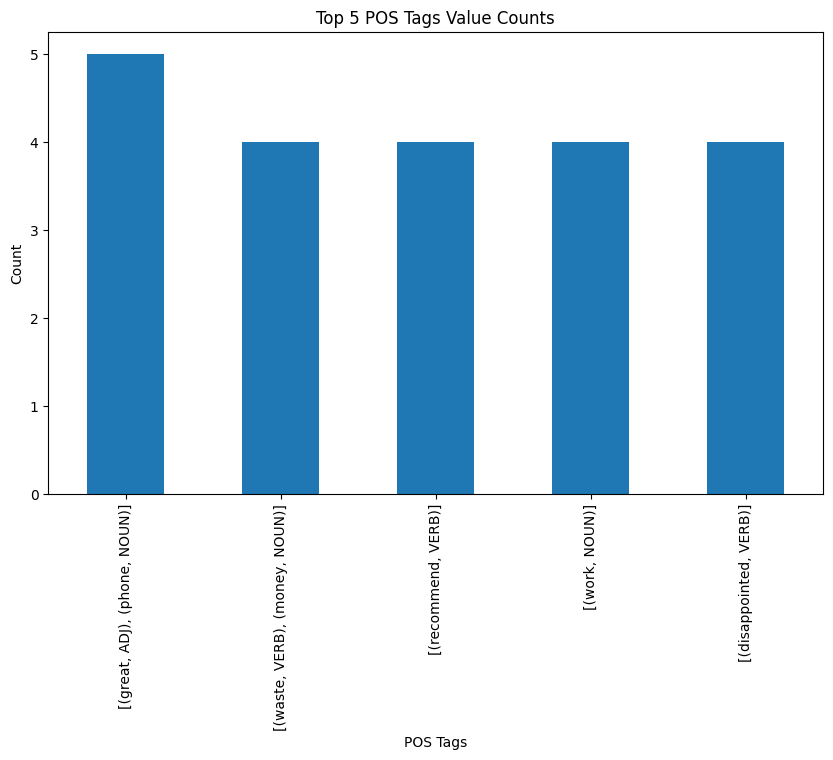

In [37]:
import matplotlib.pyplot as plt

# Assuming 'word_vectorised' is your DataFrame and 'pos_tags' is the column
pos_tags_df = pd.DataFrame({'pos_tags': word_vectorised['pos_tags']})

# Display the top 5 value counts
top_value_counts = pos_tags_df['pos_tags'].value_counts().head(5)

# Plot the top 5 value counts
plt.figure(figsize=(10, 6))
top_value_counts.plot(kind='bar')
plt.title('Top 5 POS Tags Value Counts')
plt.xlabel('POS Tags')
plt.ylabel('Count')
plt.show()


In [ ]:
# Assuming 'word_vectorised' is your DataFrame and 'Review' is the column
combined_text = ' '.join(word_vectorised['Review'])

# Apply SpaCy for named entity recognition
doc = nlp(combined_text)

# Visualize the named entities
displacy.serve(doc, style="ent", auto_select_port=True)


C:\Users\Ashiq\Desktop\fanshawe NLP\spacy\lib\site-packages\spacy\util.py:1817: UserWarning: [W124] 0.0.0.0:5000 is already in use, using the nearest available port 5001 as an alternative.
  warnings.warn(Warnings.W124.format(host=host, port=start, serve_port=port))
C:\Users\Ashiq\Desktop\fanshawe NLP\spacy\lib\site-packages\spacy\displacy\__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5001 ...

